## Questions:

1. In this lab we will model the relationship between Grad.Rate (graduation rate) and two predictors: Accept (number of accepted applications) and Expend (educational expenditures per student) in the College dataset.

    a. Fit a Ridge regression model, use cross-validation to determine the best
regularization parameter (lambda). Report the optimal lambda and the test set
Mean Squared Error (MSE). 2pt.

    b. Repeat the process using Lasso regression. Determine the optimal lambda, the
corresponding MSE, and note any coefficients set to zero by the Lasso model. 2pt.

    c. Compare the two models. 1pt.



In [82]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)
import pandas as pd
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Import data
df = pd.read_csv('College.csv')
df
print(df.columns)

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')


In [83]:
import sklearn.linear_model as skl
# 1 a: Ridge regression with predictors Accept and Expand
X = df[['Accept', 'Expend']]
y = df['Grad.Rate']

X = np.array(X)
Xs = X - X.mean(0)[None,:]
print(Xs)
# # drop NA values
# valid = ~np.isnan(y)
# Xs = Xs[valid,:]
# y = y[valid]

X_scale = X.std(0)
Xs = Xs / X_scale[None,:]
lambdas = 10**np.linspace(8, -2, 100) / y.std()
soln_array = skl.ElasticNet.path(Xs,
                                 y,
                                 l1_ratio=0.,
                                 alphas=lambdas)[1]
soln_array.shape

[[ -786.8043758  -2619.17117117]
 [  -94.8043758    866.82882883]
 [ -921.8043758   -925.17117117]
 ...
 [ -103.8043758  -1337.17117117]
 [  434.1956242  30725.82882883]
 [ -163.8043758  -5151.17117117]]


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1779384.496106358, tolerance: 355.87690000000003
  model = cd_fast.enet_coordinate_descent_gram(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordina

(2, 100)

In [84]:
design = MS(df[['Accept', 'Expend']]).fit(df)
Y = np.array(df['Grad.Rate'])
X = design.transform(df)
D = design.fit_transform(df)
D = D.drop('intercept', axis=1)
X = np.asarray(D)

In [85]:
soln_path = pd.DataFrame(soln_array.T,
                         columns=D.columns,
                         index=-np.log(lambdas))
soln_path.index.name = 'negative log(lambda)'
soln_path

,Accept,Expend
negative log(lambda),,
-15.577068,1.984937e-07,0.000001
-15.344484,2.504707e-07,0.000001
-15.111899,3.160581e-07,0.000002
-14.879315,3.988200e-07,0.000002
-14.646731,5.032537e-07,0.000003
...,...,...
6.518445,3.256262e-01,6.650450
6.751030,3.254700e-01,6.652504
6.983614,3.253460e-01,6.654133


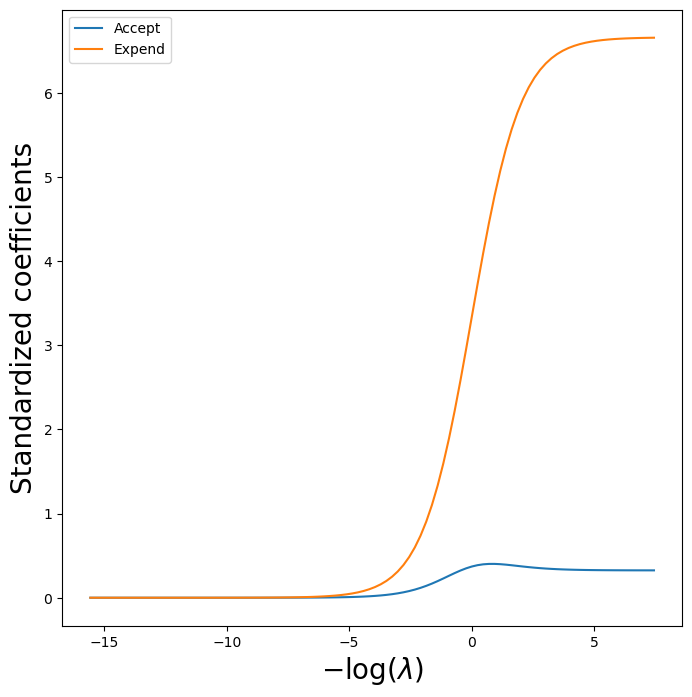

In [86]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
ax.legend(loc='upper left');

In [87]:
# beta_hat = soln_path.loc[soln_path.index[39]]
# lambdas[39], beta_hat

In [88]:
# np.linalg.norm(beta_hat)

In [89]:
# beta_hat = soln_path.loc[soln_path.index[59]]
# lambdas[59], np.linalg.norm(beta_hat)


In [90]:
from sklearn.pipeline import Pipeline
ridge = skl.ElasticNet(alpha=lambdas[59], l1_ratio=0)
scaler = StandardScaler(with_mean=True,  with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('ridge', ridge)])
pipe.fit(X, y)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.121e+05, tolerance: 2.290e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=6.389086624840489, l1_ratio=0))])

In [91]:
np.linalg.norm(ridge.coef_)

0.9154219272790363

In [92]:
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [93]:
from sklearn import model_selection as skm
validation = skm.ShuffleSplit(n_splits=1,
                              test_size=0.5,
                              random_state=0)
ridge.alpha = 0.01
results = skm.cross_validate(ridge,
                             X,
                             Y,
                             scoring='neg_mean_squared_error',
                             cv=validation)
-results['test_score']


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.852e+04, tolerance: 1.157e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([251.0608875])

In [94]:
ridge.alpha = 1e10
results = skm.cross_validate(ridge,
                             X,
                             Y,
                             scoring='neg_mean_squared_error',
                             cv=validation)
-results['test_score']


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.783e+04, tolerance: 1.157e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([291.20762093])

In [95]:
param_grid = {'ridge__alpha': lambdas}
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=validation,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)
grid.best_params_['ridge__alpha']
grid.best_estimator_


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.785e+04, tolerance: 1.157e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.785e+04, tolerance: 1.157e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.19511347385683, l1_ratio=0))])

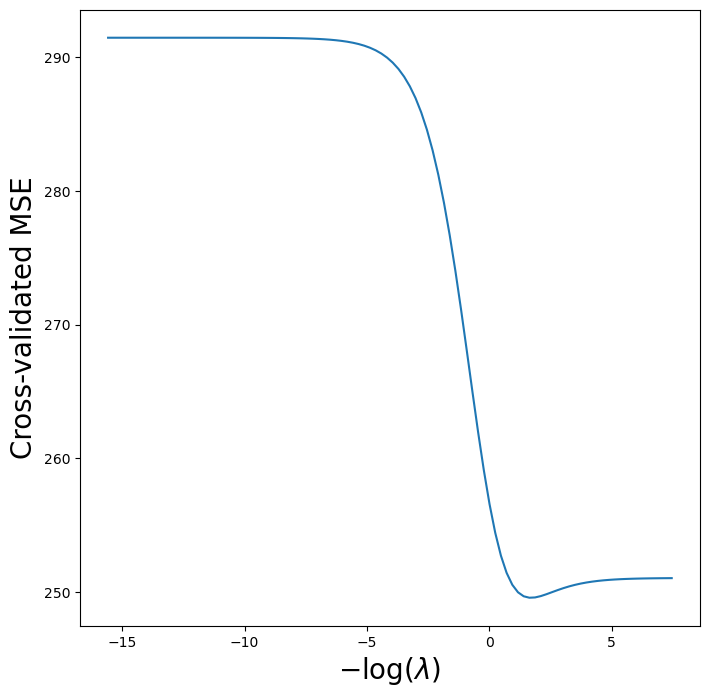

In [96]:
K = 5
ridge_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            -grid.cv_results_['mean_test_score'],
            yerr=grid.cv_results_['std_test_score'] / np.sqrt(K))
# ax.set_ylim([50000,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);


In [97]:
K = 5
kfold = skm.KFold(K,
                  random_state=0,
                  shuffle=True)


grid_r2 = skm.GridSearchCV(pipe, 
                           param_grid,
                           cv=kfold)
grid_r2.fit(X, Y)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.054e+04, tolerance: 1.811e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.374e+04, tolerance: 1.875e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge',
                                        ElasticNet(alpha=10000000000.0,
                                                   l1_ratio=0))]),
             param_grid={'ridge__alpha': array([5.82149778e+06, 4.61343743e+06, 3.65607027e+06, 2.89737316e+06,
       2.29611868e+06, 1.81963479e+06, 1.44202945e+06, 1.14278368e+06,
       9.05636522e+05, 7.17701455...
       1.22536948e-01, 9.71084357e-02, 7.69567746e-02, 6.09869278e-02,
       4.83310973e-02, 3.83015681e-02, 3.03533377e-02, 2.40545010e-02,
       1.90627807e-02, 1.51069277e-02, 1.19719818e-02, 9.48759086e-03,
       7.51875351e-03, 5.95848357e-03, 4.72199633e-03, 3.74210134e-03,
       2.96555131e-03, 2.35014870e-03, 1.86245265e-03, 1.47596188e-03,
       1.16967455e-03, 9.26947074e-04, 7.34589704e-04, 5.82149778e-04])})

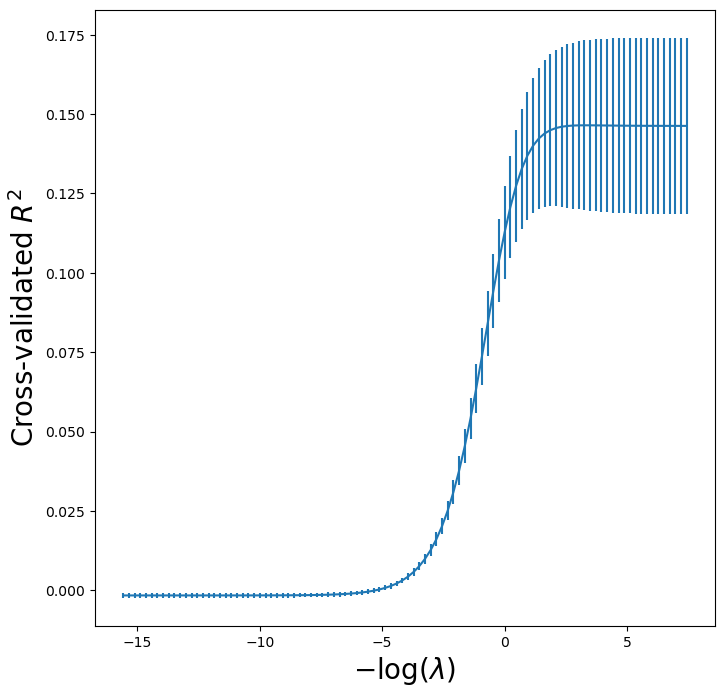

In [98]:
# # cross-validated R^2 for ridge regression
# r2_fig, ax = subplots(figsize=(8,8))
# ax.errorbar(-np.log(lambdas),
#             grid_r2.cv_results_['mean_test_score'],
#             yerr=grid_r2.cv_results_['std_test_score'] / np.sqrt(K))
# ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
# ax.set_ylabel('Cross-validated $R^2$', fontsize=20);


In [99]:
ridgeCV = skl.ElasticNetCV(alphas=lambdas, 
                           l1_ratio=0,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('ridge', ridgeCV)])
pipeCV.fit(X, Y)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90537.8061620591, tolerance: 18.107561674718198
  model = cd_fast.enet_coordinate_descent_gram(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Ob

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge',
                 ElasticNetCV(alphas=array([5.82149778e+06, 4.61343743e+06, 3.65607027e+06, 2.89737316e+06,
       2.29611868e+06, 1.81963479e+06, 1.44202945e+06, 1.14278368e+06,
       9.05636522e+05, 7.17701455e+05, 5.68766130e+05, 4.50737431e+05,
       3.57201706e+05, 2.83076243e+05, 2.24333081e+05, 1.77780131e+05,
       1.40887713e+05, 1.11651103e+05,...
       4.83310973e-02, 3.83015681e-02, 3.03533377e-02, 2.40545010e-02,
       1.90627807e-02, 1.51069277e-02, 1.19719818e-02, 9.48759086e-03,
       7.51875351e-03, 5.95848357e-03, 4.72199633e-03, 3.74210134e-03,
       2.96555131e-03, 2.35014870e-03, 1.86245265e-03, 1.47596188e-03,
       1.16967455e-03, 9.26947074e-04, 7.34589704e-04, 5.82149778e-04]),
                              cv=KFold(n_splits=5, random_state=0, shuffle=True),
                              l1_ratio=0))])

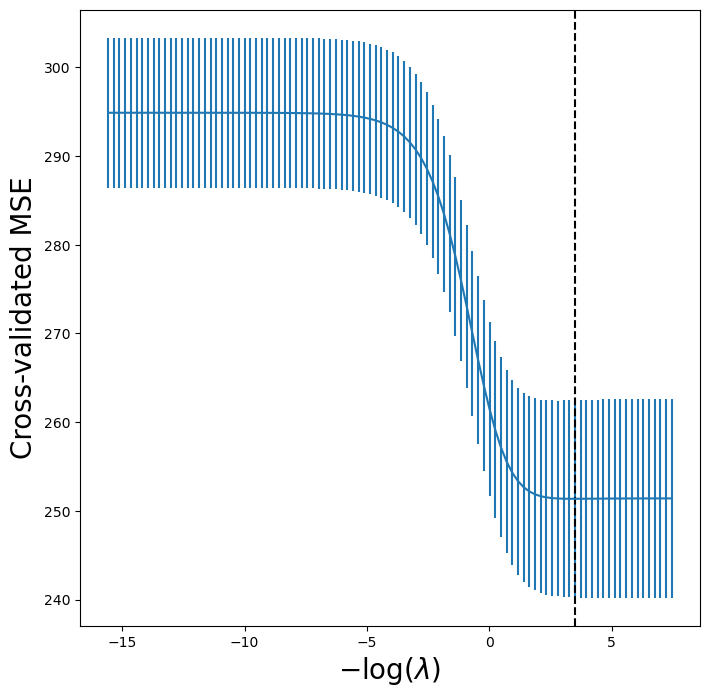

In [100]:
tuned_ridge = pipeCV.named_steps['ridge']
ridgeCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            tuned_ridge.mse_path_.mean(1),
            yerr=tuned_ridge.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_ridge.alpha_), c='k', ls='--')
# ax.set_ylim([50000,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);


In [119]:
print(np.min(tuned_ridge.mse_path_.mean(1)))
# report test MSE of the Ridge regression model
-tuned_ridge.score(X, Y)

251.36177544847789


17400212.70158754

In [102]:
tuned_ridge.coef_

array([0.33926097, 6.46241007])

In [103]:
outer_valid = skm.ShuffleSplit(n_splits=1, 
                               test_size=0.25,
                               random_state=1)
inner_cv = skm.KFold(n_splits=5,
                     shuffle=True,
                     random_state=2)
ridgeCV = skl.ElasticNetCV(alphas=lambdas,
                           l1_ratio=0,
                           cv=inner_cv)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('ridge', ridgeCV)]);


In [104]:
results = skm.cross_validate(pipeCV, 
                             X,
                             y,
                             cv=outer_valid,
                             scoring='neg_mean_squared_error')
-results['test_score']


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73058.66469499595, tolerance: 14.611733333333332
  model = cd_fast.enet_coordinate_descent_gram(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: O

array([237.18945612])

In [105]:
# 1 b: Lasso regression
lassoCV = skl.ElasticNetCV(n_alphas=100, 
                           l1_ratio=1,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('lasso', lassoCV)])
pipeCV.fit(X, Y)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_


0.20463511375367993

In [106]:
lambdas, soln_array = skl.Lasso.path(Xs, 
                                    Y,
                                    l1_ratio=1,
                                    n_alphas=100)[:2]
soln_path = pd.DataFrame(soln_array.T,
                         columns=D.columns,
                         index=-np.log(lambdas))


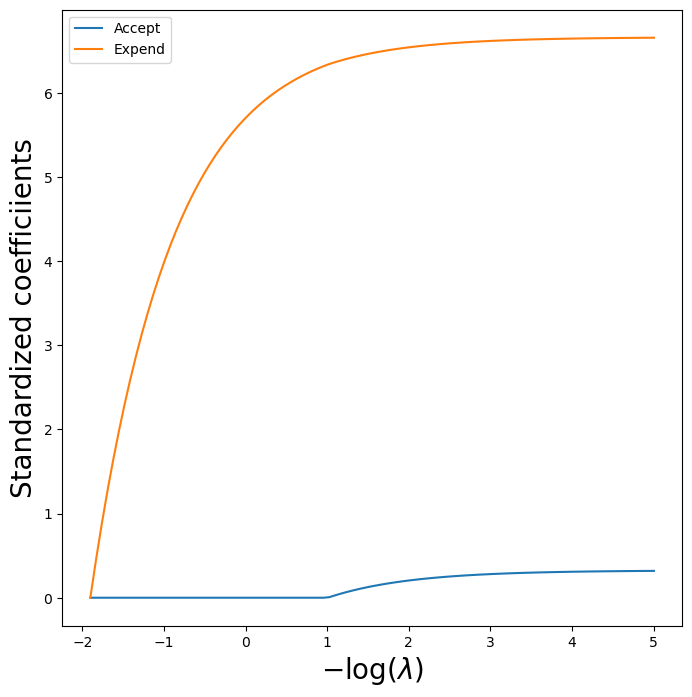

In [107]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20);


In [108]:
np.min(tuned_lasso.mse_path_.mean(1))

251.37567813541114

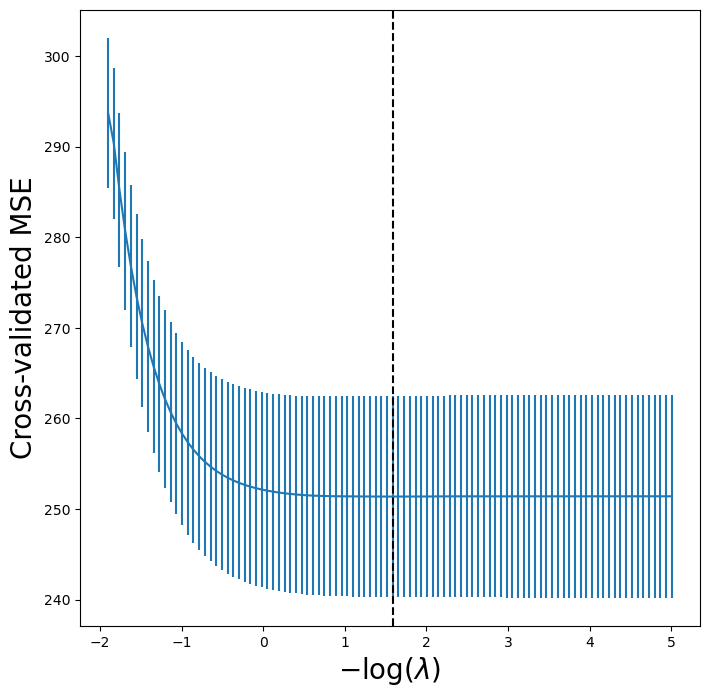

In [109]:
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
            tuned_lasso.mse_path_.mean(1),
            yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
# ax.set_ylim([50000,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [120]:
# report test MSE of the Lasso regression model
-tuned_lasso.score(X, Y)

17300382.190911196

In [110]:
tuned_lasso.coef_

array([0.14293029, 6.47841645])

In [121]:
# compare two models. 
# 1 c: Ridge regression vs. Lasso regression
print('Ridge regression coefficients:', tuned_ridge.coef_)
print('Lasso regression coefficients:', tuned_lasso.coef_)
# Comparing the two models, we can see that the Lasso regression model has larger coefficients for 'Accept', 
# yet smaller coefficients for 'Expend' compared to the Ridge regression model.
# This can be because Lasso regression can shrink some coefficients to zero, even though the coefficients of 'Appect'
# did not shrink to zero in this case.
# Comparing lambdas, 
print('Ridge regression lambda:', tuned_ridge.alpha_)
print('Lasso regression lambda:', tuned_lasso.alpha_)
# The lambda of the Lasso regression model is smaller than the lambda of the Ridge regression model,
# which means that the Lasso regression model puts more weight on the penalty term than the Ridge regression model.
# Compare test MSE
print('Ridge regression test MSE:', -tuned_ridge.score(X, Y))
print('Lasso regression test MSE:', -tuned_lasso.score(X, Y))
# The test MSE of the Lasso regression model is slightly smaller than the test MSE of the Ridge regression model,


Ridge regression coefficients: [0.33926097 6.46241007]
Lasso regression coefficients: [0.14293029 6.47841645]
Ridge regression lambda: 0.030353337663847294
Lasso regression lambda: 0.20463511375367993
Ridge regression test MSE: 17400212.70158754
Lasso regression test MSE: 17300382.190911196
